# Ex 4.10 - Coding Etiquette & Excel Reporting [Part 1]

### This script contains the following points:

##### 1. Import Libraries & Data.
##### 2. Address possible security implications.
##### 3. Regional segmentation of the data and idetifying difference in spending habits between different U.S. regions.
##### 4.  Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.
##### 5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.
##### 6. Visualizations to show distributions of profiles.
##### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
##### 8. Compare customer profiles with regions and departments.

### 1. Import Libraries & Data.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Turn project folder path into a string.
path = '/Users/asadagha/Documents/CF Data Analytics/Data Analytics Immersion/Achievement 4/Instacart Basket Analysis'

In [7]:
# Import Data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_orders_products_merged.pkl'))

### 2. Address possible security implications.

The customer and prices data used in this analysis are fabricated and only used for learning purposes. Hence it would not be considered as PII and is not cause for any concern.

### 3. Regional segmentation of the data and idetifying difference in spending habits between different U.S. regions.

In [11]:
# Create an empty list 'result'. Set up a for loop to categorize the states into separate regions and store the result in the created list.
result = []
for value in df['state']:
    if value in ('Maine'	'New Hampshire'	'Vermont'	'Massachusetts'	'Rhode Island'	'Connecticut'	'New York'	'Pennsylvania'	'New Jersey'
) :
        result.append('Northeast')
    elif value in ('Wisconsin'	'Michigan'	'Illinois'	'Indiana'	'Ohio'	'North Dakota'	'South Dakota'	'Nebraska'	'Kansas'	'Minnesota'	'Iowa'	'Missouri'
) :
        result.append('Midwest')
    elif value in ('Delaware'	'Maryland'	'District of Columbia'	'Virginia'	'West Virginia'	'North Carolina'	'South Carolina'	'Georgia'	'Florida'	'Kentucky'	'Tennessee'	'Mississippi'	'Alabama'	'Oklahoma'	'Texas'	'Arkansas'	'Louisiana'
) :
        result.append('South')
    elif value in ('Idaho'	'Montana'	'Wyoming'	'Nevada'	'Utah'	'Colorado'	'Arizona'	'New Mexico'	'Alaska'	'Washington'	'Oregon'	'California'	'Hawaii'
) :
        result.append('West')
    else :
        result.append('N/A')

In [12]:
#Assign the values in 'result' to new column 'region' in our dataframe
df['region']=result

In [13]:
# Ensure all columns are displayed
pd.set_option('display.max_columns', None)

In [14]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,False,5,0,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,False,1,1,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,False,20,0,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.930208,Low_spender,8.0,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both,Northeast
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,NaN,True,10,0,Mid-range product,Regularly busy,Slowest days,Most orders,3,New customer,4.972414,Low_spender,9.0,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Midwest
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,False,11,1,Mid-range product,Least busy,Slowest days,Average orders,3,New customer,4.972414,Low_spender,9.0,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Midwest


In [15]:
# Create crosstab between 'region' and 'spending_flag'
crosstab = pd.crosstab(df['region'], df['spender_flag'], dropna = False)

In [16]:
# Copy crosstab to clipboard
crosstab.to_clipboard()

In [17]:
# Print the crosstab
print(crosstab)

spender_flag  High_spender  Low_spender
region                                 
Midwest             155975      7441350
Northeast           108225      5614511
South               209691     10582194
West                160354      8132559


The highest numbers of high spenders and low spenders both are found in the south. This might be due to there being a greater number of total users of instacart in the south. Furthermore, the second largest region with the high spenders are in the West, followed by the Midwest. 

### 4.  Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [20]:
# Create a flag for customers with < 5 orders
df.loc[df['max_order'] < 5, 'activity_flag'] = 'low-activity customer'

In [21]:
# Create a flag for customers with >= 5 orders
df.loc[df['max_order'] >= 5, 'activity_flag'] = 'high-activity customer'

In [22]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,region,activity_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,False,5,0,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,high-activity customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,False,1,1,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,high-activity customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,False,20,0,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.930208,Low_spender,8.0,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both,Northeast,high-activity customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,NaN,True,10,0,Mid-range product,Regularly busy,Slowest days,Most orders,3,New customer,4.972414,Low_spender,9.0,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Midwest,low-activity customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,False,11,1,Mid-range product,Least busy,Slowest days,Average orders,3,New customer,4.972414,Low_spender,9.0,Frequent customer,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both,Midwest,low-activity customer


In [23]:
df['activity_flag'].value_counts(dropna = False)

activity_flag
high-activity customer    30964564
low-activity customer      1440295
Name: count, dtype: int64

In [24]:
# Create a new dataframe, excluding low activity customers
df_2 = df[df['activity_flag'] != 'low-activity customer']

In [25]:
# Export the new dataframe
df_2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'valuable_customers_ords_prods.pkl'))

### 5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

#### 5.1 Age Young adult =< 25, Adult 25-40, Older Adult 40-65, Senior 65+

In [28]:
#Creating age profiling variables
df_2.loc[df_2['age'] <= 25 ,'age_group'] = 'Young Adult'
df_2.loc[(df_2['age'] > 25) & (df_2['age'] <= 40) ,'age_group'] = 'Adult'
df_2.loc[(df_2['age'] > 40) & (df_2['age'] <= 65) ,'age_group'] = 'Older Adult'
df_2.loc[df_2['age'] > 65 ,'age_group'] = 'Senior'

/var/folders/43/fcmpd7jx0z18k499r5yr6q7r0000gn/T/ipykernel_23231/2699140829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[df_2['age'] <= 25 ,'age_group'] = 'Young Adult'


In [29]:
df_2['age_group'].value_counts()

age_group
Older Adult    12085297
Senior          7730834
Adult           7283915
Young Adult     3864518
Name: count, dtype: int64

#### 5.2. Income :  Low, Middle, & High Income groups 

In [31]:
#Creating income profiling variables
df_2.loc[df_2['income'] <= 50000 ,'income_group'] = 'Low'
df_2.loc[(df_2['income'] > 50000) & (df_2['age'] <= 100000) ,'income_group'] = 'Middle'
df_2.loc[df_2['income'] > 100000 ,'income_group'] = 'High'

/var/folders/43/fcmpd7jx0z18k499r5yr6q7r0000gn/T/ipykernel_23231/2912838035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[df_2['income'] <= 50000 ,'income_group'] = 'Low'


In [32]:
df_2['income_group'].value_counts()

income_group
High      14207028
Middle    13394982
Low        3362554
Name: count, dtype: int64

In [33]:
df_2.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,region,activity_flag,age_group,income_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,False,5,0,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,high-activity customer,Senior,Low
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,False,1,1,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,high-activity customer,Senior,Low
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,False,20,0,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.930208,Low_spender,8.0,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both,Northeast,high-activity customer,Senior,High
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,False,7,0,Mid-range product,Regularly busy,Busiest days,Average orders,26,Regular customer,6.935398,Low_spender,11.0,Regular customer,Christina,Wallace,Female,Hawaii,51,1/4/2019,2,married,57797,both,West,high-activity customer,Older Adult,Middle
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,False,2,0,Mid-range product,Regularly busy,Regularly busy,Most orders,9,New customer,5.957576,Low_spender,20.0,Regular customer,nan,Parks,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,South,high-activity customer,Young Adult,Low


#### 5.3 Number of dependents

In [35]:
df_2.loc[df_2['n_dependants'] > 0 ,'dependents_flag'] = 'Has Dependents'
df_2.loc[df_2['n_dependants'] == 0 ,'dependents_flag'] = 'No Dependents'

/var/folders/43/fcmpd7jx0z18k499r5yr6q7r0000gn/T/ipykernel_23231/2365052607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[df_2['n_dependants'] > 0 ,'dependents_flag'] = 'Has Dependents'


In [36]:
df_2['dependents_flag'].value_counts()

dependents_flag
Has Dependents    23224883
No Dependents      7739681
Name: count, dtype: int64

In [37]:
df_2.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,region,activity_flag,age_group,income_group,dependents_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,False,5,0,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,high-activity customer,Senior,Low,Has Dependents
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,False,1,1,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,high-activity customer,Senior,Low,Has Dependents
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,False,20,0,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.930208,Low_spender,8.0,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both,Northeast,high-activity customer,Senior,High,Has Dependents
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,False,7,0,Mid-range product,Regularly busy,Busiest days,Average orders,26,Regular customer,6.935398,Low_spender,11.0,Regular customer,Christina,Wallace,Female,Hawaii,51,1/4/2019,2,married,57797,both,West,high-activity customer,Older Adult,Middle,Has Dependents
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,False,2,0,Mid-range product,Regularly busy,Regularly busy,Most orders,9,New customer,5.957576,Low_spender,20.0,Regular customer,nan,Parks,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,South,high-activity customer,Young Adult,Low,Has Dependents


### 6. Visualizations to show distributions of profiles.

#### 6.1 Age Groups

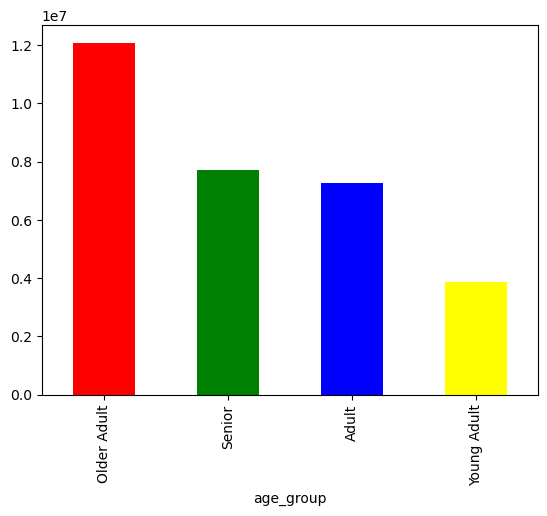

In [40]:
# Bar chart showing customers by age group
bar_age_group = df_2['age_group'].value_counts().plot.bar(color = ['red','green','blue','yellow'])

In [41]:
# Export Bar Chart
bar_age_group.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task 10','5.1.bar_age_group.png'))

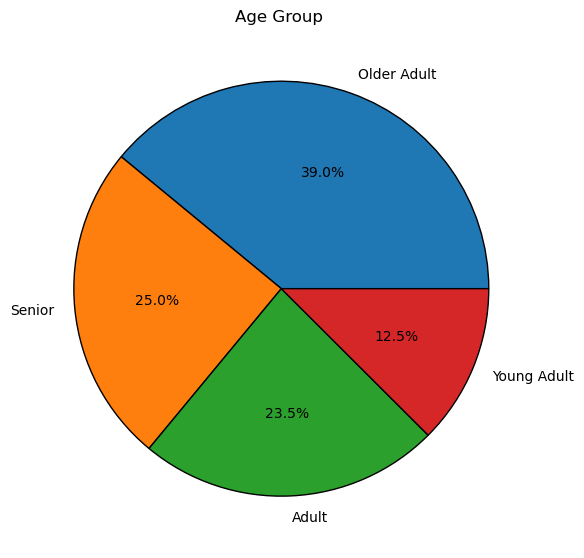

In [42]:
# Pie Chart showing customers by age group
pie_age_group_counts = df_2['age_group'].value_counts()
plt.figure(figsize=(6,6))
age_group_pie_chart=pie_age_group_counts.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Age Group ')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [43]:
# Export Pie Chart
age_group_pie_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task 10', '5.1.age_group_pie_chart.png'))

#### 6.2 Income Group

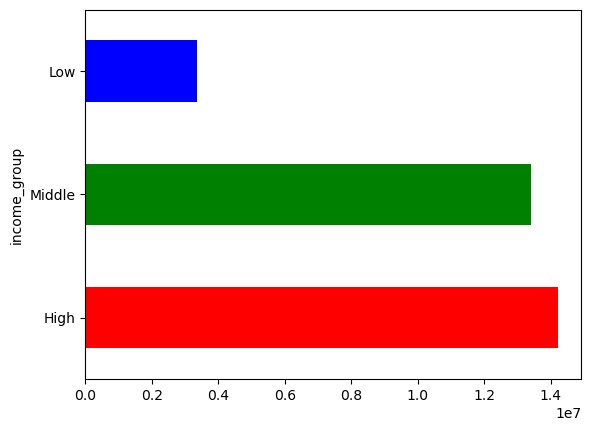

In [45]:
# Horizontal Bar Chart showing customers by income_group
bar_income_group = df_2['income_group'].value_counts().plot.barh(color = ['red','green','blue'])

In [46]:
# Export Bar Chart
bar_income_group.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task 10', '5.2.bar_income_group.png'))

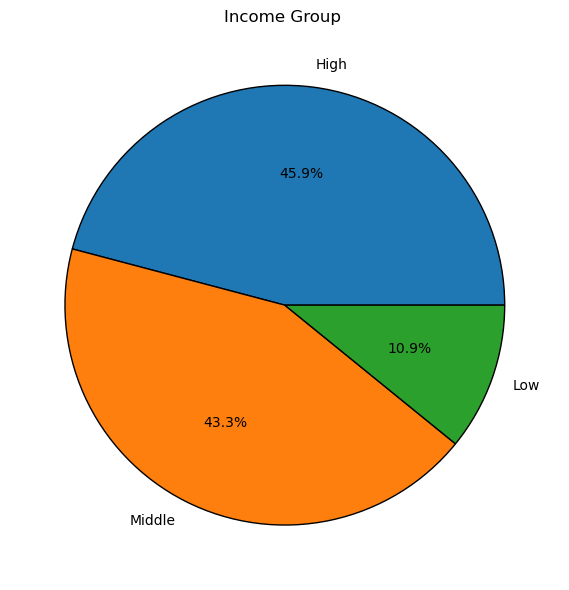

In [47]:
# Pie Chart showing customers by income_group
pie_income_group_counts = df_2['income_group'].value_counts()
plt.figure(figsize=(6,6))
income_group_pie_chart=pie_income_group_counts.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Income Group ')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [48]:
# Export Pie Chart
income_group_pie_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task 10', '5.2.income_group_pie_chart.png'))

#### 6.3 Customers w/ Dependents

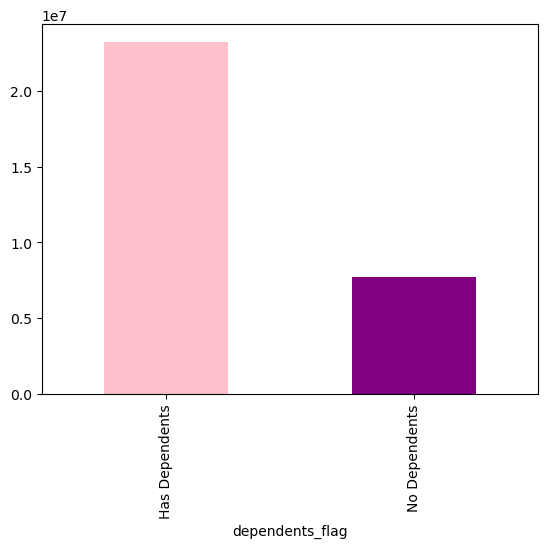

In [50]:
# Bar Chart showing customers' dependents status
dependents_flag_bar_chart = df_2['dependents_flag'].value_counts().plot.bar(color = ['pink','purple'])

In [51]:
# Export Bar Chart
dependents_flag_bar_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task 10', '5.3.dependents_flag_bar_chart.png'))

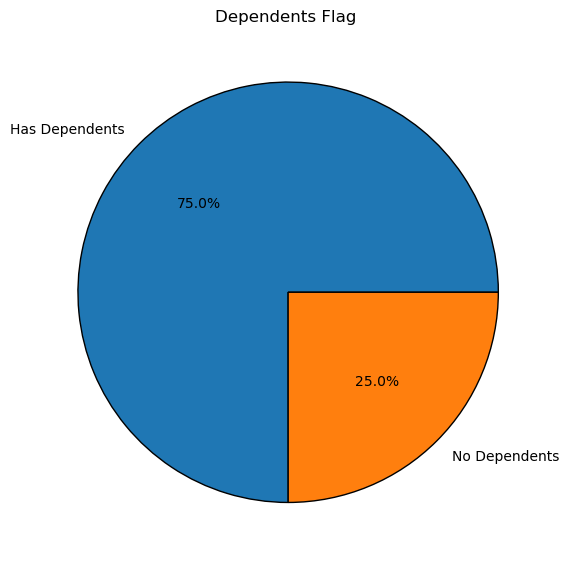

In [52]:
# Pie Chart showing customers' dependents status
dependents_flag_counts = df_2['dependents_flag'].value_counts()
plt.figure(figsize=(6,6))
dependents_flag_pie_chart=dependents_flag_counts.plot.pie(autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Dependents Flag ')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [53]:
# Export Pie Chart
dependents_flag_pie_chart.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task 10', '5.3.dependents_flag_pie_chart.png'))

### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

Frequency of usage and expendidture is analyzed based on days_since_prior_order and prices columns respectively.

In [56]:
df_2.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spender_flag', 'customer_frequency', 'frequency_flag',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'marital_status', 'income', '_merge', 'region',
       'activity_flag', 'age_group', 'income_group', 'dependents_flag'],
      dtype='object')

In [57]:
df_2.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,region,activity_flag,age_group,income_group,dependents_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,False,5,0,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,high-activity customer,Senior,Low,Has Dependents
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,False,1,1,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both,Midwest,high-activity customer,Senior,Low,Has Dependents
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,False,20,0,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.930208,Low_spender,8.0,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both,Northeast,high-activity customer,Senior,High,Has Dependents
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,False,7,0,Mid-range product,Regularly busy,Busiest days,Average orders,26,Regular customer,6.935398,Low_spender,11.0,Regular customer,Christina,Wallace,Female,Hawaii,51,1/4/2019,2,married,57797,both,West,high-activity customer,Older Adult,Middle,Has Dependents
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,False,2,0,Mid-range product,Regularly busy,Regularly busy,Most orders,9,New customer,5.957576,Low_spender,20.0,Regular customer,nan,Parks,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,both,South,high-activity customer,Young Adult,Low,Has Dependents


In [58]:
# Create a subset of customer profiles and show the total price of each order
customer_profile = df_2.groupby(['user_id','order_number','loyalty_flag','spender_flag','region','age_group','income_group','marital_status','dependents_flag','days_since_prior_order'])['prices'].sum().reset_index()

In [59]:
customer_profile.head()

,user_id,order_number,loyalty_flag,spender_flag,region,age_group,income_group,marital_status,dependents_flag,days_since_prior_order,prices
0,1,2,New customer,Low_spender,South,Adult,Low,married,Has Dependents,15.0,35.4
1,1,3,New customer,Low_spender,South,Adult,Low,married,Has Dependents,21.0,28.2
2,1,4,New customer,Low_spender,South,Adult,Low,married,Has Dependents,29.0,26.0
3,1,5,New customer,Low_spender,South,Adult,Low,married,Has Dependents,28.0,57.0
4,1,6,New customer,Low_spender,South,Adult,Low,married,Has Dependents,19.0,25.0


In [60]:
# Rename 'prices' to 'order_total'
customer_profile.rename(columns = {'prices' : 'order_total'}, inplace = True)

In [61]:
# Aggregate variables for customer profiles for usage frequency
usage_frequency = customer_profile.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'days_since_prior_order': ['max', 'min', 'mean']})

In [62]:
usage_frequency

order_number           days_since_prior_order                 
                 max min  mean                    max   min       mean
user_id                                                               
1                 10   2   6.0                   30.0   0.0  19.555556
10                 5   2   3.5                   30.0  12.0  19.750000
100                5   2   3.5                   30.0  18.0  26.000000
1000               7   2   4.5                   30.0   5.0  12.166667
10000             72   2  37.0                   17.0   0.0   4.507042
...              ...  ..   ...                    ...   ...        ...
99994             11   2   6.5                   30.0   5.0  19.200000
99995              5   2   3.5                   30.0   6.0  18.000000
99996             12   2   7.0                   30.0  15.0  22.181818
99998              5   2   3.5                   12.0   7.0   8.750000
99999             34   2  18.0                   24.0   1.0   6.969697

[162631 rows x 6 columns]

In [63]:
# Aggregate variables for customer profiles for expenditure
customer_expenditure = customer_profile.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'order_total': ['max', 'min', 'mean']})

In [64]:
customer_expenditure

order_number           order_total                   
                 max min  mean         max    min        mean
user_id                                                      
1                 10   2   6.0        63.1   25.0   38.233333
10                 5   2   3.5       429.6  240.0  299.500000
100                5   2   3.5        97.6   28.2   60.700000
1000               7   2   4.5       134.4  112.9  122.916667
10000             72   2  37.0       298.2   11.8  121.188732
...              ...  ..   ...         ...    ...         ...
99994             11   2   6.5       174.0   86.2  128.960000
99995              5   2   3.5       132.5   42.9   88.825000
99996             12   2   7.0       127.1    2.8   78.118182
99998              5   2   3.5        51.2   20.9   42.325000
99999             34   2  18.0       159.7    6.7   70.118182

[162631 rows x 6 columns]

### 8. Compare customer profiles with regions and departments.

In [113]:
# Importing department dataframe
departments = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [115]:
departments

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [117]:
# Renaming index column as department_id
departments.rename(columns ={'Unnamed: 0' : 'department_id'}, inplace = True)

In [125]:
# Drop the current '_merge' column in df_2
df_2 = df_2.drop(columns=['_merge'])

In [126]:
#Merging df_2 dataset with departments dataset
instacart_dept = df_2.merge(departments, on = 'department_id', how = 'left', indicator = True)

In [140]:
# Exporting New Merged Dataframe
instacart_dept.to_pickle(os.path.join(path,'02 Data','Prepared Data','instacart_dept_merged.pkl'))

In [6]:
# Import dataframe
instacart_dept = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_dept_merged.pkl'))

In [128]:
instacart_dept.shape 

(30964564, 40)

In [131]:
instacart_dept.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,customer_frequency,frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,marital_status,income,region,activity_flag,age_group,income_group,dependents_flag,department,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,False,5,0,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high-activity customer,Senior,Low,Has Dependents,snacks,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,False,1,1,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low_spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,high-activity customer,Senior,Low,Has Dependents,snacks,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,False,20,0,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.930208,Low_spender,8.0,Frequent customer,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,Northeast,high-activity customer,Senior,High,Has Dependents,snacks,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,False,7,0,Mid-range product,Regularly busy,Busiest days,Average orders,26,Regular customer,6.935398,Low_spender,11.0,Regular customer,Christina,Wallace,Female,Hawaii,51,1/4/2019,2,married,57797,West,high-activity customer,Older Adult,Middle,Has Dependents,snacks,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,False,2,0,Mid-range product,Regularly busy,Regularly busy,Most orders,9,New customer,5.957576,Low_spender,20.0,Regular customer,nan,Parks,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,South,high-activity customer,Young Adult,Low,Has Dependents,snacks,both


In [148]:
instacart_dept['department'].value_counts()

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

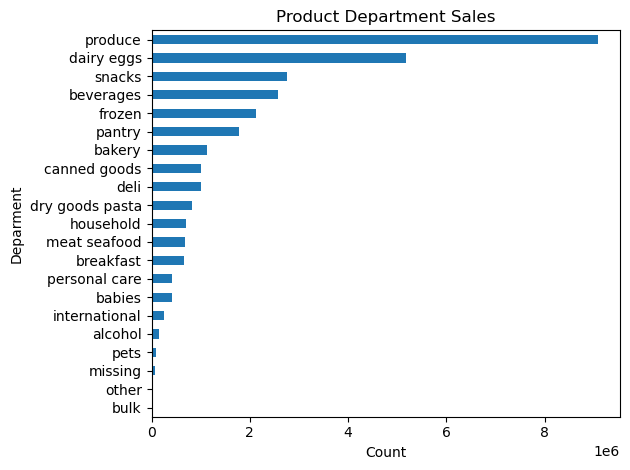

In [150]:
#Creating bar chart of Departments
dept_bar = instacart_dept['department'].value_counts().sort_values(ascending= True).plot.barh()
plt.title('Product Department Sales')
plt.xlabel('Count')
plt.ylabel('Deparment')
plt.tight_layout()

In [154]:
#Exporting bar chart
dept_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','Task 10', 'departments_product_bar.png'))

In [16]:
# Crosstab age group and department
region_dept_cross = pd.crosstab(instacart_dept['region'], instacart_dept['department'], dropna = False)

In [136]:
region_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,34043,95741,261753,598979,156155,7929,237459,1212490,234464,193463,498225,166992,60666,158260,15563,7983,420334,100398,21358,2134115,645143
Northeast,25017,72712,199300,462929,117904,5599,176936,914616,178398,143817,370436,124604,44678,118571,11512,6268,312731,74765,17734,1593004,493154
South,48813,139511,371620,859419,223172,11180,337458,1723016,333620,272813,709906,230061,84649,224120,21787,11579,591754,142496,29909,3027476,916780
West,36754,102428,288155,650574,173619,8743,260221,1327060,257352,212043,543164,178200,65998,173830,15906,8581,457886,106647,24059,2324678,711329


In [34]:
# Set a color palette
custom_colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2',
    '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78', '#98df8a', '#ff9896',
    '#c5b0d5', '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5', '#1a55d3'
]

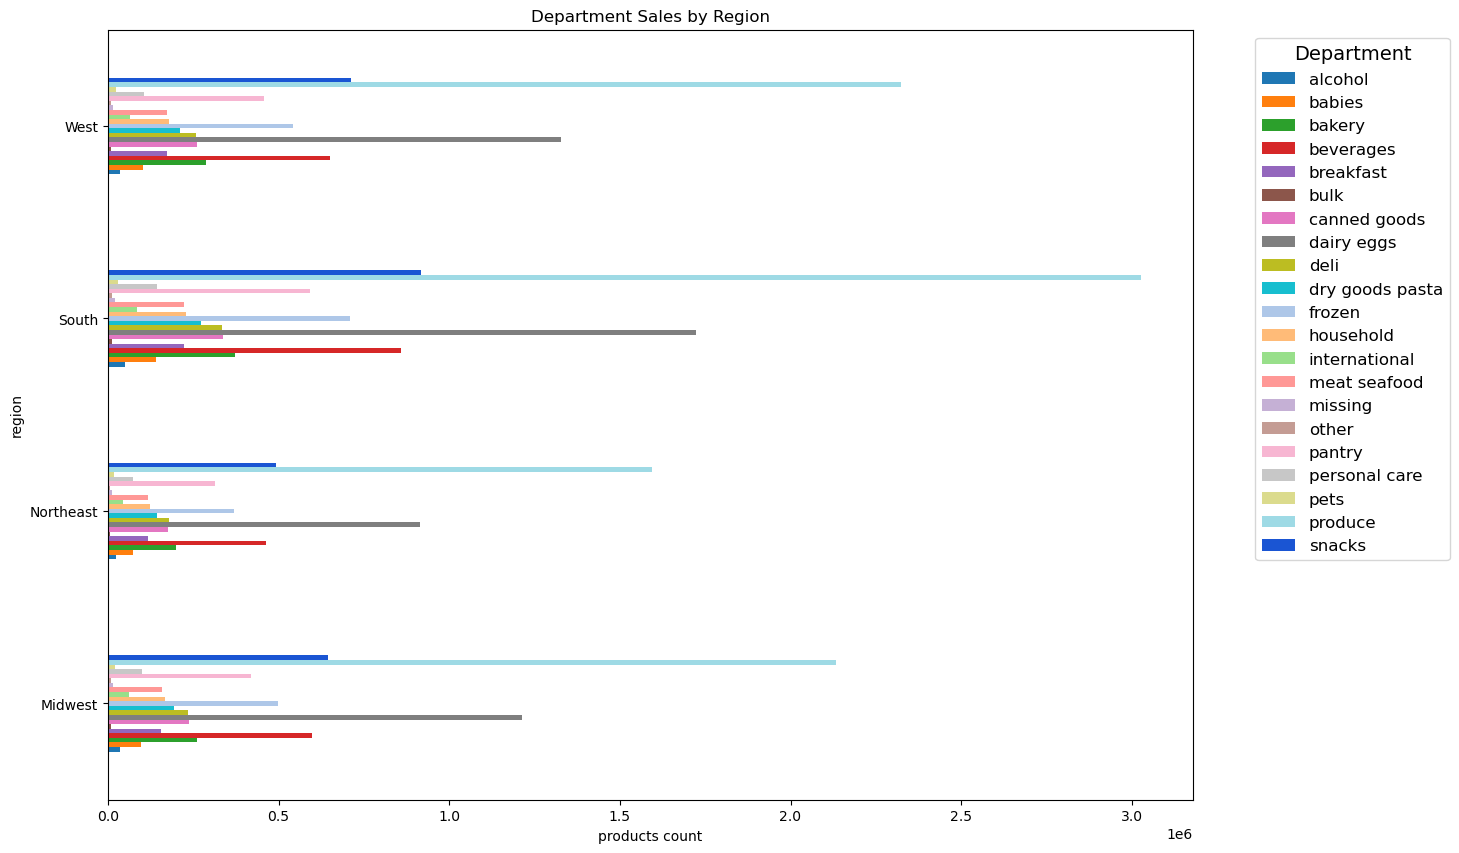

In [36]:
# Bar chart
region_dept_bar = region_dept_cross.plot(kind = 'barh', figsize=(14,10), color=custom_colors)
plt.title('Department Sales by Region')
plt.xlabel('products count')
plt.ylabel('region')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [22]:
# Export bar chart
region_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Task 10','region_depts_bar.png'))

In [8]:
# Crosstab income group vs department
income_dept_cross = pd.crosstab(instacart_dept['income_group'], instacart_dept['department'], dropna = False)
income_dept_cross

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_group,,,,,,,,,,,,,,,,,,,,,
High,69142,196696,527703,1126437,297594,14218,485226,2406160,462089,392709,...,319958,119987,335535,29452,15749,839920,193412,45089,4236921,1104579
Low,18047,29240,106757,383121,91408,4676,78975,502363,106448,64481,...,87216,21636,34278,6547,3886,166061,47782,8612,826314,559529
Middle,57438,184456,486368,1062343,281848,14557,447873,2268659,435297,364946,...,292683,114368,304968,28769,14776,776724,183112,39359,4016038,1102298


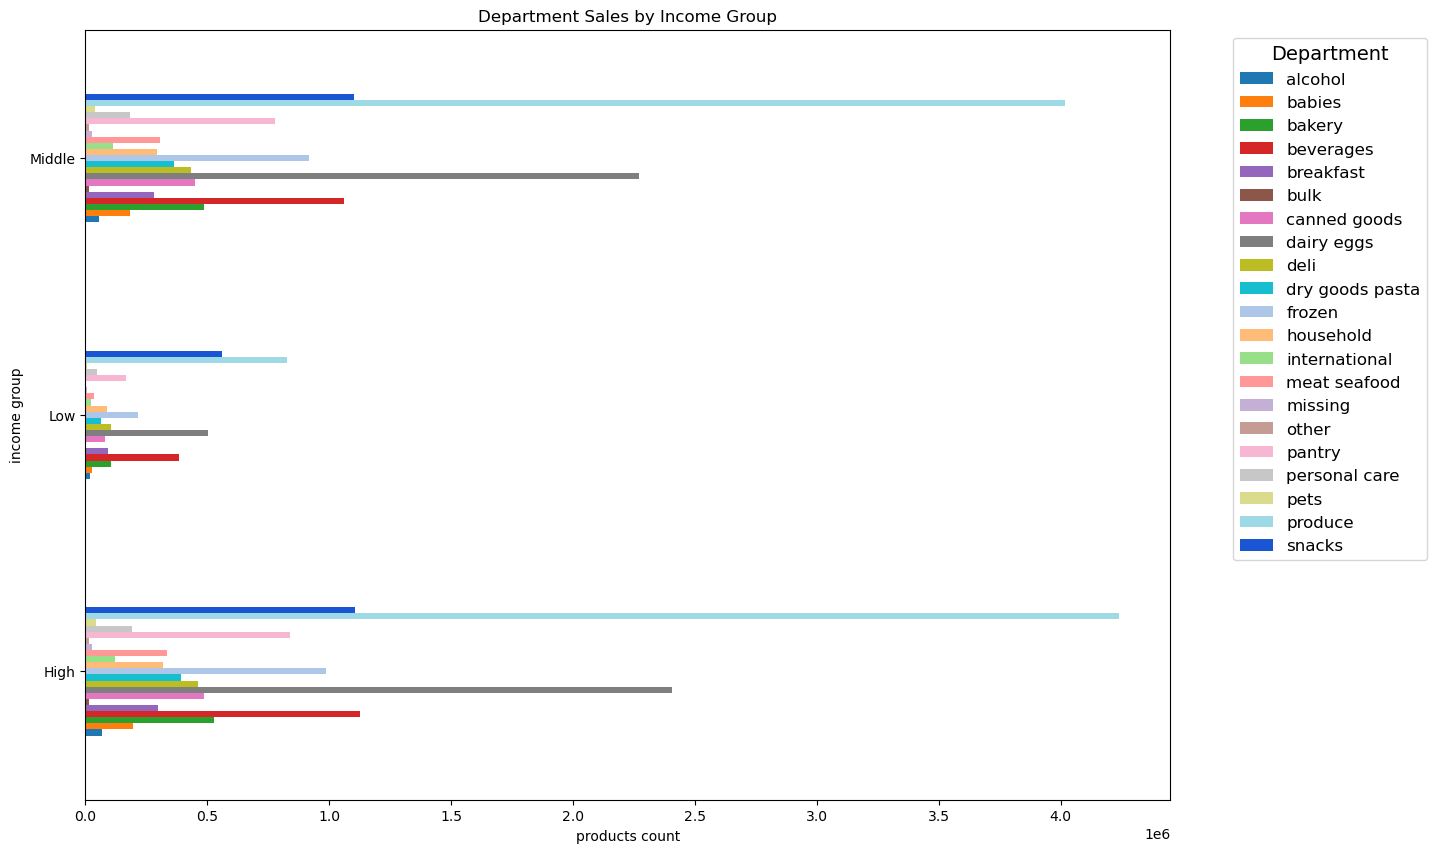

In [38]:
# Bar chart
income_dept_bar = income_dept_cross.plot(kind = 'barh', figsize=(14,10), color=custom_colors)
plt.title('Department Sales by Income Group')
plt.xlabel('products count')
plt.ylabel('income group')

# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)

In [26]:
# Export bar chart
income_dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 10', 'income_depts_bar.png'))

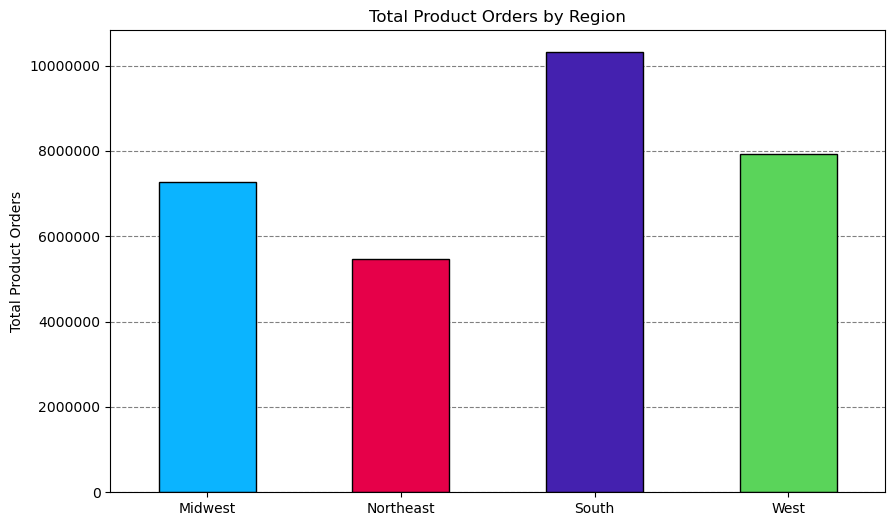

In [46]:
# Plot chart of total orders by region

# colors = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a', '#ffa300', '#ebdc78'], # colour palette
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')

# Plot bars
prod_ord_region_fig = instacart_dept['region'].value_counts().sort_index().plot.bar(color = ['#0bb4ff', '#e60049', '#4421af', '#5ad45a'], edgecolor='black', zorder=2, alpha = 1)
plt.title("Total Product Orders by Region")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Total Product Orders")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')

In [50]:
# Export bar chart
prod_ord_region_fig.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','Task 10','instacart_total_orders_by_region.png'), bbox_inches = 'tight')